In [11]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")  # path contains python_file.py
from plot_utils import get_results_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
FOLDER = "C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/experiments/gbm_regression/simulated_data/5_is_connected_for_boxplot"
fi, metrics = get_results_data(FOLDER, normalize=False, one_hot=False)
fi_norm, _ = get_results_data(FOLDER, normalize=True, one_hot=False)

def translate_value_names(df):
    df['index'] = df['index'].map({str(i): F'X{i}' for i in range(5,10)})
    df_map = { 'gain': 'Gain', 'permutation_test' : "Permutation", 'permutation_train' : 'Permutation Train', 'shap_test': 'Shap','shap_train': 'Shap Train'}
    model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CATBOOST', 'Ours' : 'Ours', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'SKLEARN Mean Imputing','XGBOOST_MI' : 'XGBOOST Mean Imputing'}
    df['fi_type'] = df['fi_type'].map(df_map)
    df['model'] = df['model'].map(model_map)
    
translate_value_names(fi), translate_value_names(fi_norm)

(None, None)

In [17]:
fi_norm[(fi_norm['index'] == 'X5') & (fi_norm['fi_type'] == 'Gain')].groupby('model')['fi_value'].mean()

model
CATBOOST                 0.929911
LGBM                     0.528131
Ours                     0.999887
SKLEARN Mean Imputing    0.671902
Vanilla GBM              0.251963
XGBOOST Mean Imputing    0.763541
Name: fi_value, dtype: float64

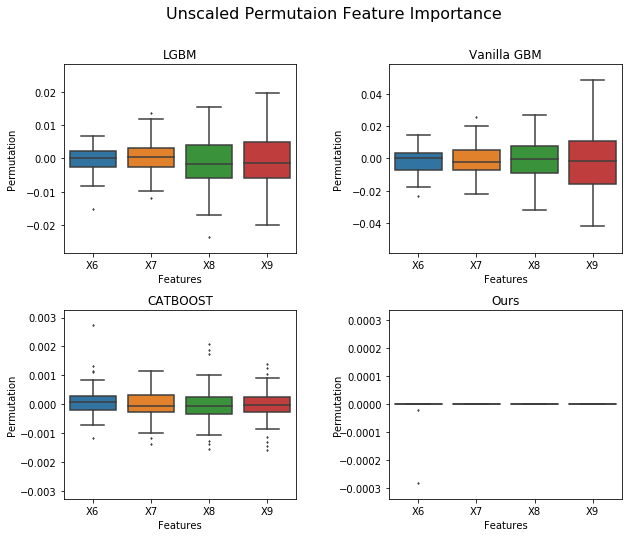

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  


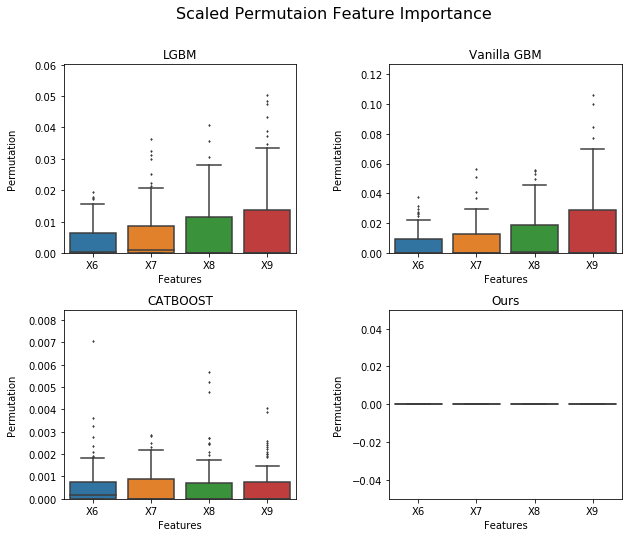

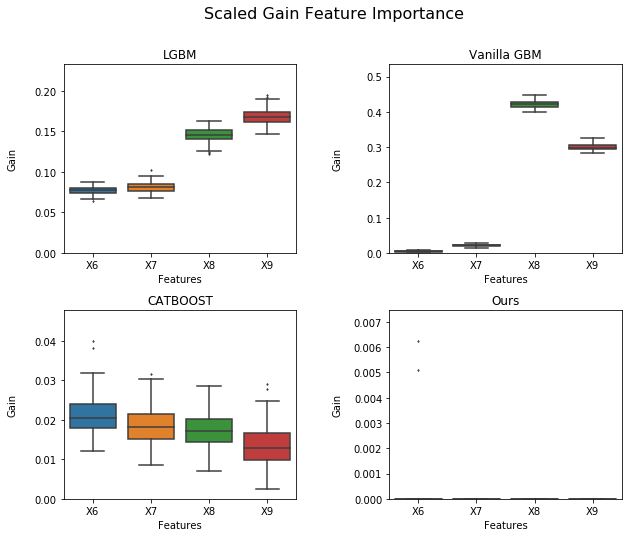

In [19]:
def first_paper_graph(data,title, fi, y_min_zero = False):
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    models = ['LGBM', 'Vanilla GBM', 'CATBOOST', 'Ours']
    fig,a =  plt.subplots(2,2,  figsize=(10, 8))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3)
    get_y_min = lambda x: 0 if y_min_zero else -x
    counter = 0
    for i in range(2):
        for j in range(2):
            temp_model = models[counter]
            plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
            ylim = plot_data[fi].apply(np.abs).max()
            a[i][j].set_title(temp_model)
            a[i][j].set_ylim(get_y_min(ylim)*1.2,ylim*1.2)
            a[i][j].yaxis.set_label_coords(-0.2, 0.5)
            sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i][j], flierprops = dict(markerfacecolor = '0.50', markersize = 1))
            counter += 1
    fig.suptitle(title, fontsize=16)
    fig.savefig(F"{title}.png")
    plt.show()
            
            
            
first_paper_graph(fi[fi['index'] != 'X5'],'Unscaled Permutaion Feature Importance', 'Permutation') 
first_paper_graph(fi_norm[fi_norm['index'] != 'X5'],'Scaled Permutaion Feature Importance', 'Permutation',  y_min_zero = True) 
first_paper_graph(fi_norm[fi_norm['index'] != 'X5'], 'Scaled Gain Feature Importance' , "Gain",   y_min_zero = True) 

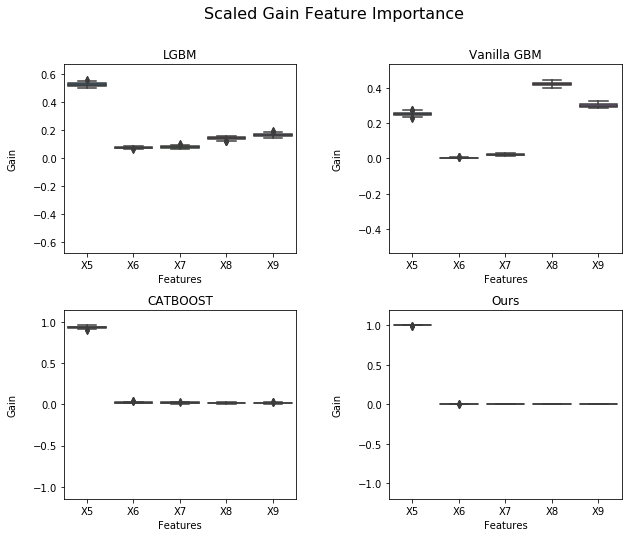

In [5]:
first_paper_graph(fi_norm, 'Scaled Gain Feature Importance' , "Gain") 

In [10]:
fi_norm[(fi_norm["Features"] == 'X5' )& (fi_norm['Feature Importance Type'] == "Gain")].groupby('Model')

,Features,Feature Importance Type,Gain,exp,Model
0,X5,Gain,0.516896,0,LGBM
0,X5,Gain,0.528039,1,LGBM
0,X5,Gain,0.517022,2,LGBM
0,X5,Gain,0.504754,3,LGBM
0,X5,Gain,0.524726,4,LGBM
...,...,...,...,...,...
0,X5,Gain,0.784133,95,XGBOOST Mean Imputing
0,X5,Gain,0.769167,96,XGBOOST Mean Imputing
0,X5,Gain,0.732363,97,XGBOOST Mean Imputing
0,X5,Gain,0.773726,98,XGBOOST Mean Imputing


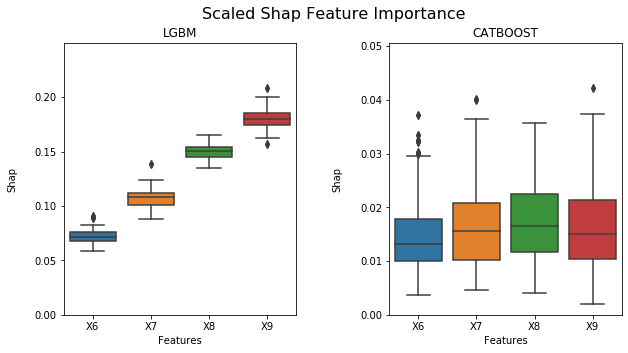

In [4]:
def first_paper_graph_shap(data,title, fi = 'Shap'):
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    models = ['LGBM', 'CATBOOST']
    fig,a =  plt.subplots(1,2,  figsize=(10, 5))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3)
    get_y_min = lambda x: -x if  fi == 'Permutation' else 0
    counter = 0
    for i in range(2):
        temp_model = models[counter]
        plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
        ylim = plot_data[fi].apply(np.abs).max()
        a[i].set_title(temp_model)
        a[i].set_ylim(get_y_min(ylim)*1.2,ylim*1.2)
        a[i].yaxis.set_label_coords(-0.2, 0.5)
        sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i])
        counter += 1
    fig.suptitle(title, fontsize=16)
    plt.show()
            
            
            
first_paper_graph_shap(fi_norm[fi_norm['index'] != 'X5'],'Scaled Shap Feature Importance') 
# first_paper_graph_shap(fi_norm[fi_norm['index'] != 'X5'], 'Scaled Gain Feature Importance')  

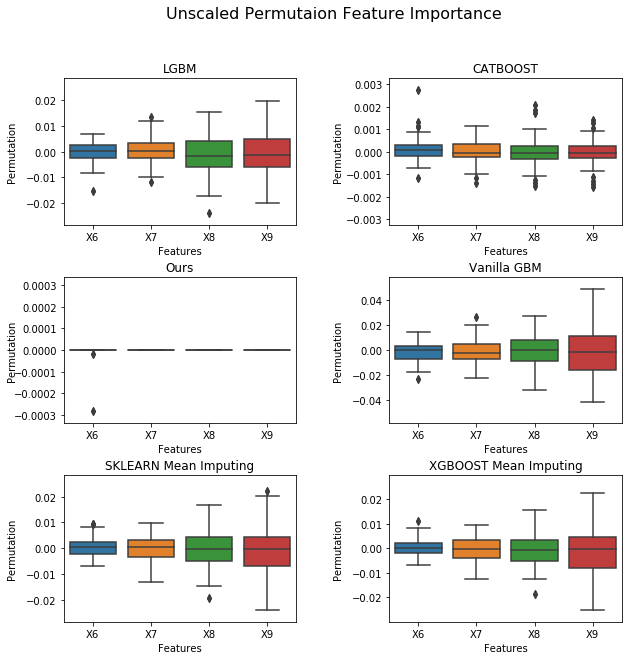

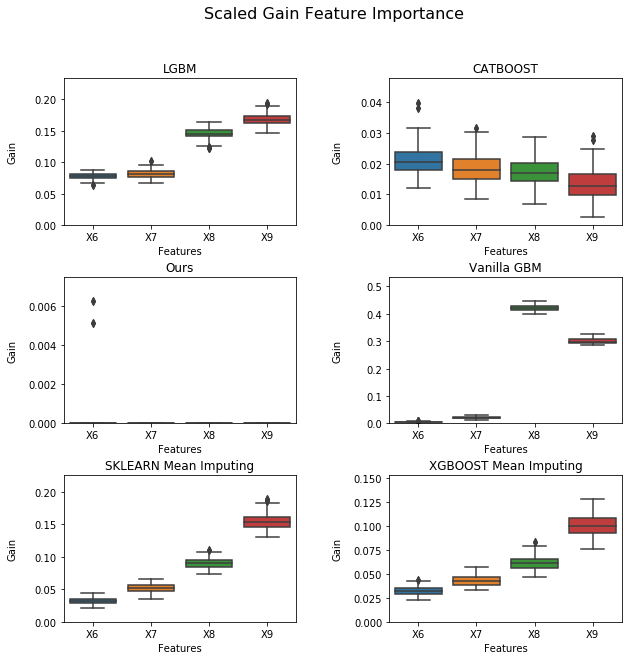

In [5]:
def first_paper_graph_2(data,title, fi):
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    models = ['LGBM', 'CATBOOST', 'Ours', 'Vanilla GBM', 'SKLEARN Mean Imputing', 'XGBOOST Mean Imputing']
    fig,a =  plt.subplots(3,2,  figsize=(10, 10))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.35)
    get_y_min = lambda x: -x if  fi == 'Permutation' else 0
    counter = 0
    for i in range(3):
        for j in range(2):
            temp_model = models[counter]
            plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
            ylim = plot_data[fi].apply(np.abs).max()
            a[i][j].set_title(temp_model)
            a[i][j].set_ylim(get_y_min(ylim)*1.2,ylim*1.2)
            a[i][j].yaxis.set_label_coords(-0.2, 0.5)
            sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i][j])
            counter += 1
    fig.suptitle(title, fontsize=16)
    plt.show()
            
first_paper_graph_2(fi[fi['index'] != 'X5'],'Unscaled Permutaion Feature Importance', 'Permutation') 
first_paper_graph_2(fi_norm[fi_norm['index'] != 'X5'], 'Scaled Gain Feature Importance' , "Gain") 